## Import Libraries & Load Dataset

In [12]:
import numpy as np
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D , Flatten , Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns

## Natural Dataset

Found 191 files belonging to 4 classes.


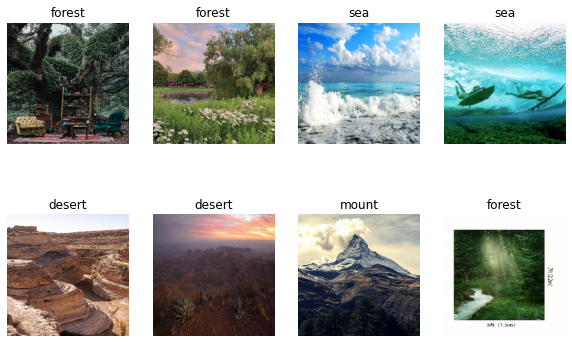

In [13]:
pic = image_dataset_from_directory("/content/drive/MyDrive/Dataset/Dataset/Test",seed=2)
labels = pic.class_names
plt.figure(figsize=(10,10))
for img, label in pic.take(1):
  for i in range(8):
    ax = plt.subplot(3,4, i + 1)
    plt.imshow(img[i].numpy().astype("uint8"))
    plt.title(labels[label[i]])
    plt.axis("off")

In [14]:
image_generator = ImageDataGenerator(
    rescale = 1.0 / 255.0,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split=0.2    
)
image_generator_test = ImageDataGenerator(
    rescale = 1.0 / 255.0
)

In [15]:
Train = image_generator.flow_from_directory(
    "/content/drive/MyDrive/Dataset/Dataset/Train",
    class_mode = "categorical",
    batch_size = 32,
    target_size = (224,224),
    subset = "training"
)
Val = image_generator.flow_from_directory(
    "/content/drive/MyDrive/Dataset/Dataset/Train",
    class_mode = "categorical",
    batch_size = 32,
    target_size = (224,224),
    subset = "validation"
)
Test = image_generator_test.flow_from_directory(
    "/content/drive/MyDrive/Dataset/Dataset/Test",
    class_mode = "categorical",
    batch_size = 32,
    target_size = (224,224)
)

Found 876 images belonging to 4 classes.
Found 218 images belonging to 4 classes.
Found 191 images belonging to 4 classes.


# Model
## CNN

In [21]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=(224,224,3),activation="relu",padding="same"))
model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4,activation="softmax"))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

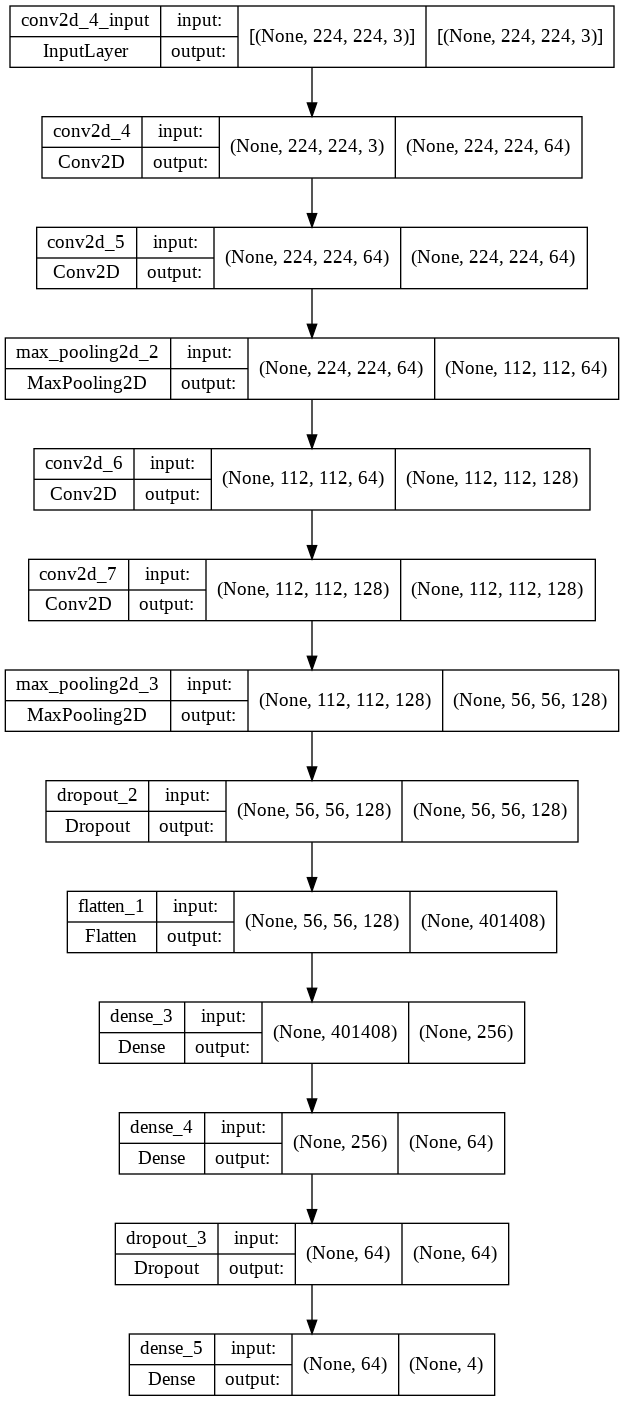

In [23]:
plot_model(model,show_shapes=True)

In [24]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
checkpoint = ModelCheckpoint("Natural_model.h5",monitor="accuracy",mode="max",save_best_only=True)

In [25]:
history = model.fit(Train,epochs=15,validation_data=Val,callbacks=[checkpoint])

Epoch 1/15
28/28 [==============================] - 602s 21s/step - loss: 1.7584 - accuracy: 0.3447 - val_loss: 1.0047 - val_accuracy: 0.6560
Epoch 2/15
28/28 [==============================] - 601s 21s/step - loss: 0.9932 - accuracy: 0.6084 - val_loss: 0.8048 - val_accuracy: 0.6697
Epoch 3/15
28/28 [==============================] - 598s 21s/step - loss: 0.8675 - accuracy: 0.6598 - val_loss: 0.7226 - val_accuracy: 0.7339
Epoch 4/15
28/28 [==============================] - 600s 22s/step - loss: 0.7991 - accuracy: 0.6998 - val_loss: 0.6928 - val_accuracy: 0.7569
Epoch 5/15
28/28 [==============================] - 593s 21s/step - loss: 0.8351 - accuracy: 0.6872 - val_loss: 0.7369 - val_accuracy: 0.7110
Epoch 6/15
28/28 [==============================] - 600s 21s/step - loss: 0.7873 - accuracy: 0.7237 - val_loss: 0.6807 - val_accuracy: 0.7385
Epoch 7/15
28/28 [==============================] - 600s 21s/step - loss: 0.7485 - accuracy: 0.7283 - val_loss: 0.6884 - val_accuracy: 0.7248
Epoch 

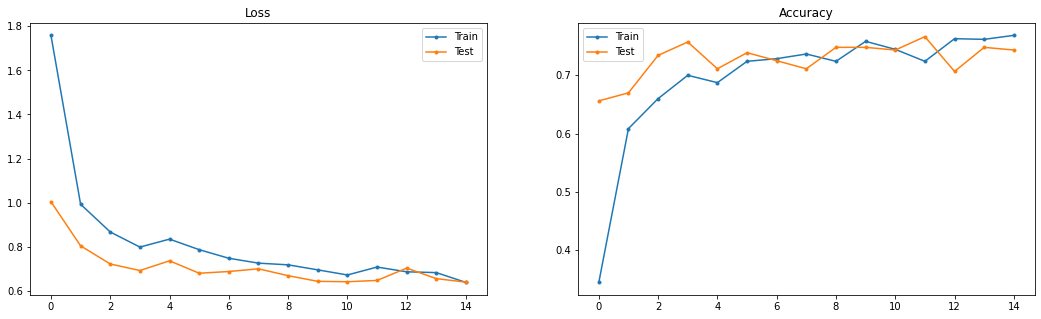

In [26]:
Test.classesfig , (ax1,ax2) = plt.subplots(1,2,figsize=(18,5))
ax1.set_title("Loss")
ax2.set_title("Accuracy")
ax1.plot(history.history["loss"],label="Train",marker=".")
ax1.plot(history.history["val_loss"],label="Test",marker=".")
ax2.plot(history.history["accuracy"],label="Train",marker=".")
ax2.plot(history.history["val_accuracy"],label="Test",marker=".")
ax1.legend()
ax2.legend()
plt.show()

In [27]:
model.evaluate(Test)

6/6 [==============================] - 35s 6s/step - loss: 0.6123 - accuracy: 0.7801


[0.6122743487358093, 0.7801046967506409]

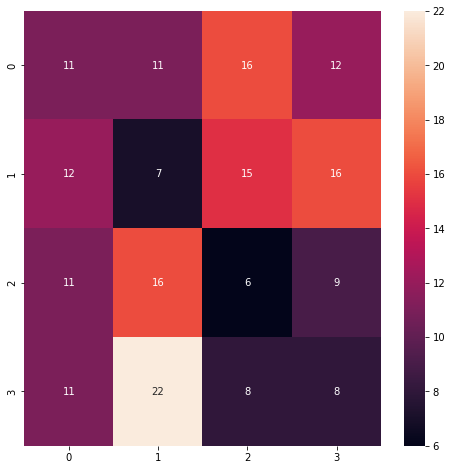

In [28]:
pred = np.argmax(model.predict(Test),axis=1)
cm = metrics.confusion_matrix(Test.classes,pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True)